In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
df = pd.read_csv(r'C:\Users\KRISHNA\Desktop\ENCRYPTIX INTERNSHIP\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
unique_species = df['species'].unique()
print("Unique values in the species column:", unique_species)

Unique values in the species column: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [40]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping wi

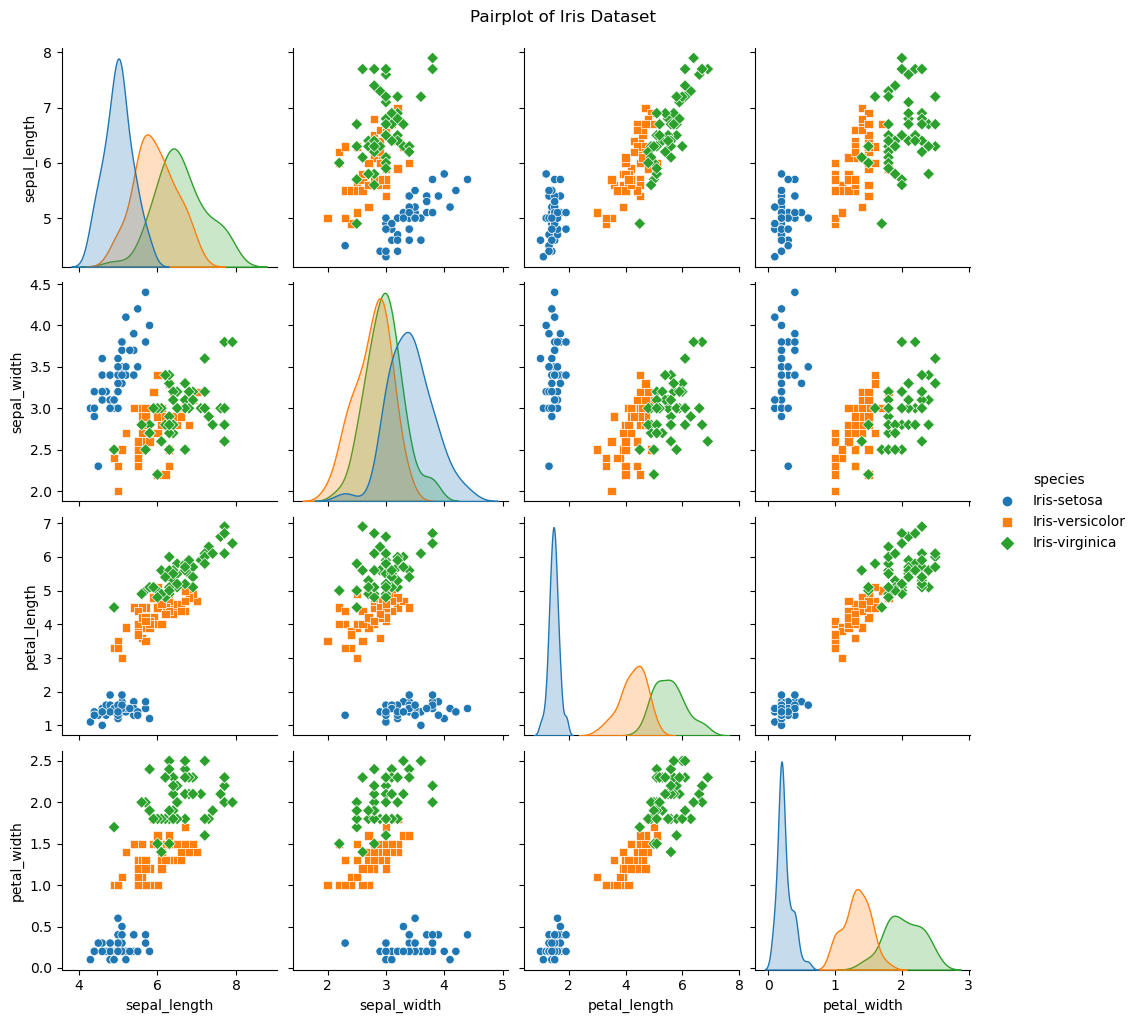

In [41]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

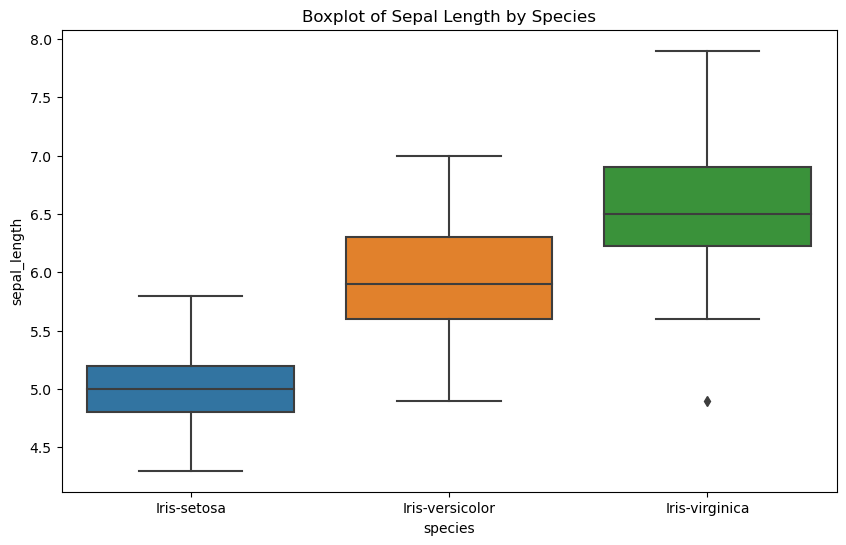

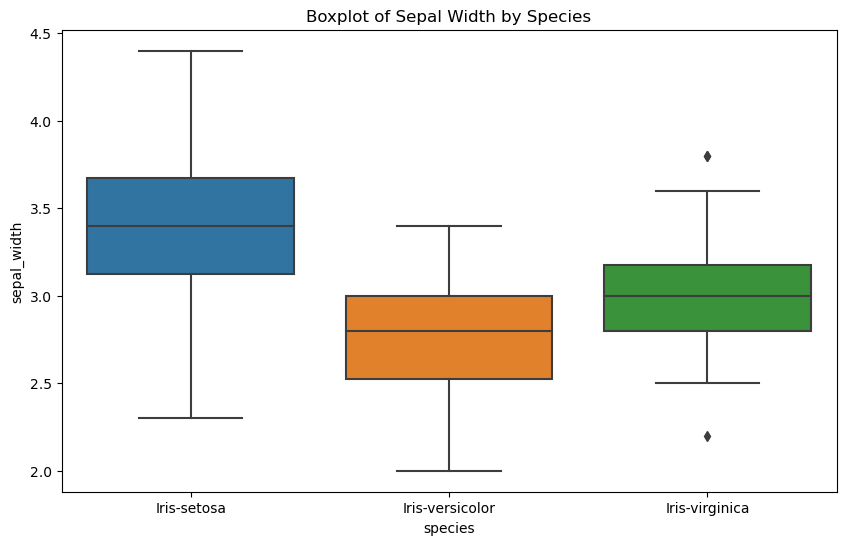

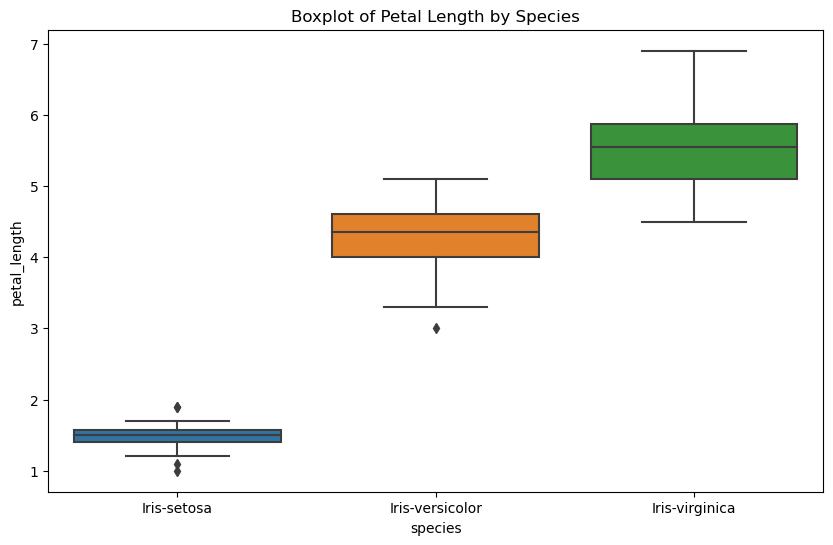

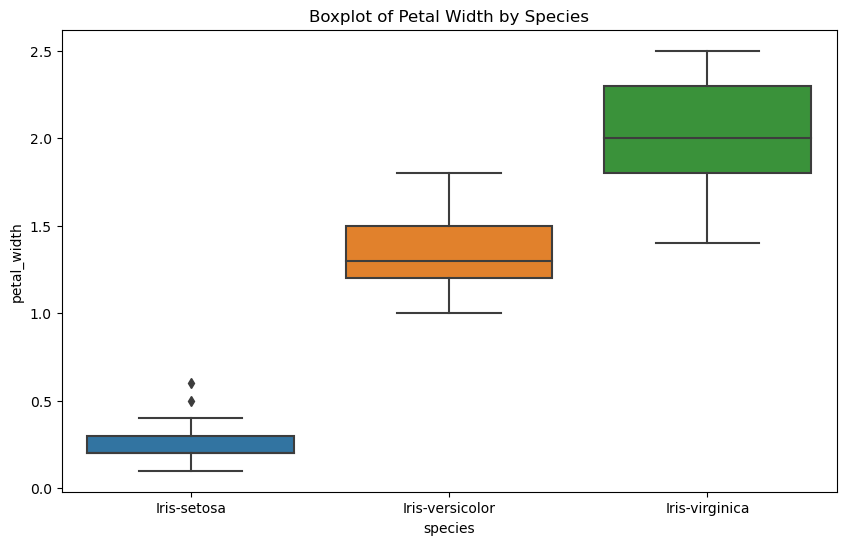

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Boxplot of Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Boxplot of Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Boxplot of Petal Width by Species')
plt.show()


In [43]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
# Spliting the data into features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_train_logistic_predicted = log_reg.predict(X_train)
acc1 = accuracy_score(y_train, y_train_logistic_predicted)
print(acc1)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

0.975


In [45]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [46]:
test_results = X_test.copy()
test_results['Actual Species'] = y_test
test_results['Predicted Species'] = y_pred
if 'label_encoder' in locals():
    test_results['Actual Species'] = test_results['Actual Species'].apply(lambda x: label_encoder.inverse_transform([x])[0])
    test_results['Predicted Species'] = test_results['Predicted Species'].apply(lambda x: label_encoder.inverse_transform([x])[0])

print("\nTest Set with Predictions:")
print(test_results)


Test Set with Predictions:
     sepal_length  sepal_width  petal_length  petal_width   Actual Species  \
73            6.1          2.8           4.7          1.2  Iris-versicolor   
18            5.7          3.8           1.7          0.3      Iris-setosa   
118           7.7          2.6           6.9          2.3   Iris-virginica   
78            6.0          2.9           4.5          1.5  Iris-versicolor   
76            6.8          2.8           4.8          1.4  Iris-versicolor   
31            5.4          3.4           1.5          0.4      Iris-setosa   
64            5.6          2.9           3.6          1.3  Iris-versicolor   
141           6.9          3.1           5.1          2.3   Iris-virginica   
68            6.2          2.2           4.5          1.5  Iris-versicolor   
82            5.8          2.7           3.9          1.2  Iris-versicolor   
110           6.5          3.2           5.1          2.0   Iris-virginica   
12            4.8          3.0      

In [47]:
print("Classification Report:")
target_names = label_encoder.classes_ if 'label_encoder' in locals() else unique_species
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

